In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
import xgboost as xgb
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
import time

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [6]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [12]:
from preprocess import preprocess

X_train, X_test, y_train = preprocess(df_train, df_test, use_custom_target_encoding=True, use_scaling=True, \
                                                     filter_features=False)

In [22]:
X_train.shape

(515937, 46)

In [24]:
xgb_pipe = Pipeline([
    ('xgb', xgb.XGBRegressor())
])

In [27]:
def test_pipeline(X, y, pipeline):
    rskf = StratifiedKFold(n_splits=5, random_state=1)
    rmse_scores = []
    for train_index, test_index in rskf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pipeline.fit(X_train, y_train)
        
        y_pred = np.round(pipeline.predict(X_test))
        y_pred[y_pred > 5] = 5
        y_pred[y_pred < 1] = 1
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    print("kfolds rmse: {0}, mean rmse: {1}".format(
        str([str(round(x, 3)) for x in sorted(rmse_scores)]),
        round(np.mean(rmse_scores), 3)
    ))

##### Target encoding without scaling

###### New data

In [28]:
test_pipeline(X_train, y_train, xgb_pipe)

/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:50:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:51:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
kfolds rmse: ['1.037', '1.037', '1.039', '1.039', '1.039'], mean rmse: 1.038


In [16]:
test_pipeline(X_train, y_train, xgb_pipe)

/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
kfolds rmse: ['1.037', '1.037', '1.039', '1.039', '1.039'], mean rmse: 1.038


###### With filter features: 1.057

##### Old data

In [10]:
test_pipeline(X_train, y_train, xgb_pipe)

/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/whiteRa2bit/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:29:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
kfolds rmse: ['1.035', '1.036', '1.037', '1.037', '1.039'], mean rmse: 1.037


###### Ohe with scaling

In [ ]:
test_pipeline(X_train, y_train, xgb_pipe)

##### Target encoding without scaling

In [ ]:
test_pipeline(X_train_transformed.values, y_train, xgb_pipe)

In [ ]:
xgb_pipe.fit(X_train, y_train)

In [81]:
y_pred = xgb_pipe.predict(X_test)

In [56]:
ensemble_pred = np.load('ensemble_pred.npy')
catboost_pred = np.load('catboost_pred.npy')

In [82]:
xgboost_pred = y_pred.copy()

(array([ 49932.,      0.,  69765.,      0.,      0., 100297.,      0.,
        123958.,      0., 171985.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

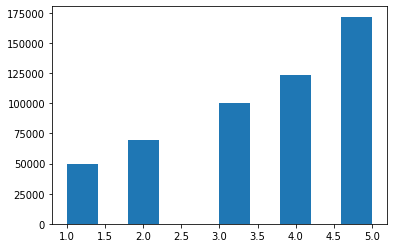

In [57]:
plt.hist(y_train)

(array([4.80000e+01, 1.31000e+02, 3.37000e+02, 1.69600e+03, 8.53500e+03,
        1.52933e+05, 5.28770e+04, 3.49100e+03, 9.80000e+02, 8.90000e+01]),
 array([-0.91740704, -0.7586756 , -0.5999441 , -0.44121265, -0.2824812 ,
        -0.12374973,  0.03498173,  0.19371319,  0.35244465,  0.5111761 ,
         0.66990757], dtype=float32),
 <a list of 10 Patch objects>)

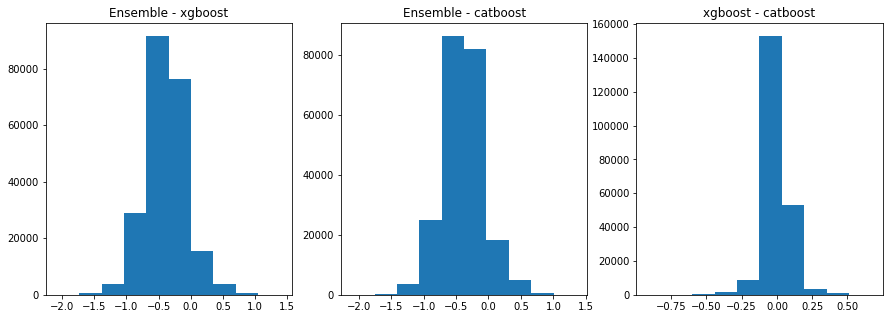

In [60]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title("Ensemble - xgboost")
ax[0].hist(ensemble_pred-xgboost_pred)

ax[1].set_title("Ensemble - catboost")
ax[1].hist(ensemble_pred - catboost_pred)

ax[2].set_title("xgboost - catboost")
ax[2].hist(xgboost_pred - catboost_pred)

(array([4.6000e+01, 5.0600e+02, 3.9730e+03, 2.8856e+04, 9.1552e+04,
        7.6321e+04, 1.5451e+04, 3.7950e+03, 5.8000e+02, 3.7000e+01]),
 array([-2.08186173, -1.73412369, -1.38638566, -1.03864763, -0.6909096 ,
        -0.34317156,  0.00456647,  0.3523045 ,  0.70004253,  1.04778057,
         1.3955186 ]),
 <a list of 10 Patch objects>)

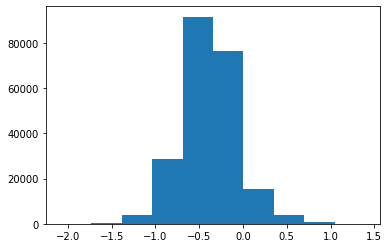

In [72]:
plt.hist(ensemble_pred - y_pred)

In [49]:
y_pred

array([3.1217813, 4.1714716, 4.1063967, ..., 5.       , 1.4058726,
       3.9732234], dtype=float32)

In [50]:
sample = pd.read_csv('./data/origin/sample_submission_L0aRkDL.csv')

In [83]:
np.save("xgboost_pred.npy", xgboost_pred)

(array([  2676.,      0.,  19918.,      0.,      0.,  64535.,      0.,
        100879.,      0.,  33109.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ],
       dtype=float32),
 <a list of 10 Patch objects>)

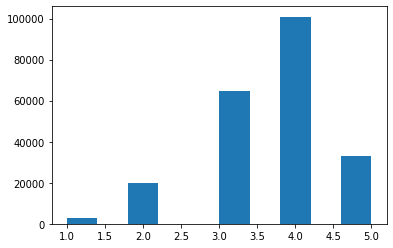

In [77]:
plt.hist(np.round(catboost_pred + 0.1))

In [78]:
sample['damage_grade'] = np.round(catboost_pred + 0.1)

In [66]:
sample.head()

,building_id,damage_grade
0,680648,3.0
1,339540,4.0
2,487192,4.0
3,571276,3.0
4,326396,4.0


In [79]:
sample.to_csv("./prediction/catboost_0.1.csv", index=False)